## Analysing Fuel Voltage Signal Data

In [2]:
import numpy as np
import pandas as pd
from scipy.signal import butter, lfilter, freqz
from scipy import signal as sg
import matplotlib.pyplot as plt
from scipy.fftpack import fft
import statsmodels.api as sm
import datetime

%matplotlib inline

C:\Users\manje_000\AppData\Local\Programs\Python\Python36\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools



### Data Gathering (From First Step Wrangling in F1)
#### Loading data in Pandas Dataframe

In [11]:
df1 = pd.DataFrame()
df2 = pd.DataFrame()
df3 = pd.DataFrame()
df4 = pd.DataFrame()
df5 = pd.DataFrame()
df6 = pd.DataFrame()

def loadData():
    global df1,df2,df3,df4,df5,df6
#     df1 = pd.read_csv(r"data\data3.csv")
#     df2 = pd.read_csv(r"data\data2.csv")
#     df3 = pd.read_csv(r"data\data12.csv")
#     df4 = pd.read_csv(r"data\data7.csv")
    df1 = pd.read_csv(r"data\Analog\data8.csv")
    #df6 = pd.read_csv(r"data\data3.csv")
    return 

loadData()
df4.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Empty DataFrame

In [12]:
df1.head()

,Unnamed: 0,datetime,speed,distance,fuelVoltage,dev_state
0,NaN,2018-02-15 12:04:29,0.0,0,3,0
1,NaN,2018-02-15 12:04:29,0.0,0,3,0
2,NaN,2018-02-15 12:05:29,0.0,0,3,0
3,NaN,2018-02-15 12:05:59,0.0,0,3,0
4,NaN,2018-02-15 12:06:29,0.0,0,3,0


In [14]:
date1 = pd.to_datetime(df1.datetime)
# date2 = pd.to_datetime(df2.datetime)
# date3 = pd.to_datetime(df3.datetime)
# date4 = pd.to_datetime(df4.datetime)
# date5 = pd.to_datetime(df5.datetime)
# date6 = pd.to_datetime(df6.datetime)

In [15]:
### Sorting w.r.t to time

### Assessing 
#### 1. Checking order of Data, as per datetime

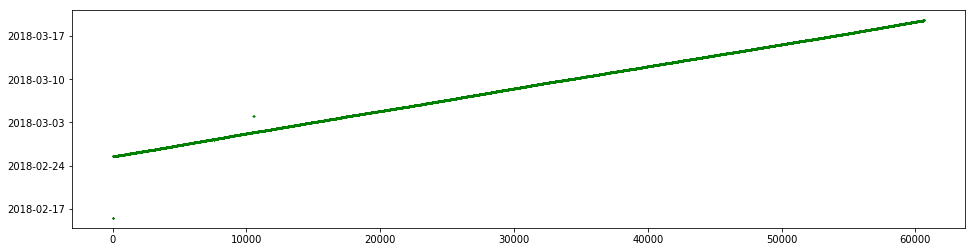

In [17]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df1.index, date1, 'g.', markersize = 1, linewidth = 1);



### Assessing 
#### 2. Plotting Fuel voltage vs Datetime

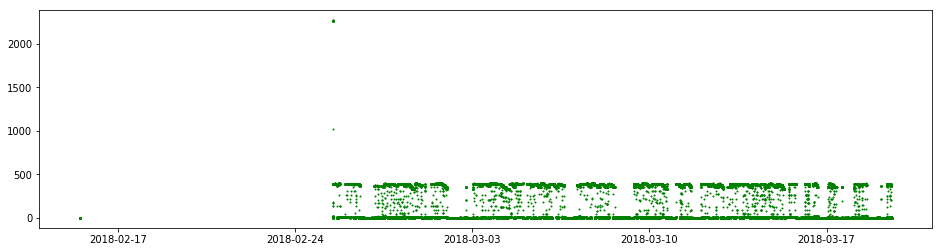

In [18]:
plt.rcParams['figure.figsize'] = [16,4]
# plt.subplot(6,1,1)
plt.plot(date1, df1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

# plt.subplot(6,1,2)
# plt.plot( date2, df2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

# plt.subplot(6,1,3)
# plt.plot(date3, df3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

# plt.subplot(6,1,4)
# plt.plot(date4, df4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

# plt.subplot(6,1,5)
# plt.plot(date5, df5.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


ValueError: x and y must have same first dimension, but have shapes (60670,) and (60653,)

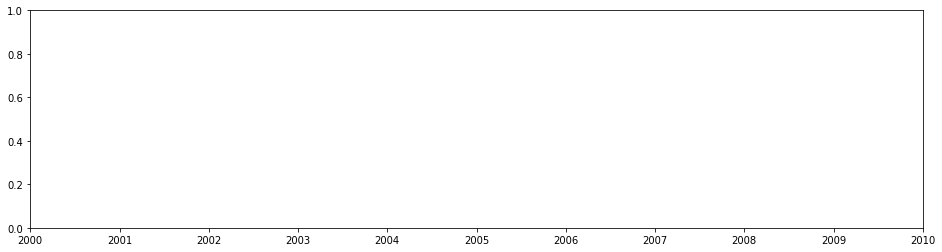

In [25]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(date1, df1.fuelVoltage, 'g-', markersize = 2, linewidth = 1);

# plt.subplot(6,1,2)
# plt.plot(date2, df2.fuelVoltage, 'g-', markersize = 2, linewidth = 1);

# plt.subplot(6,1,3)
# plt.plot(date3, df3.fuelVoltage, 'g-', markersize = 2, linewidth = 1);




### Assessing 
#### 3. Plotting Cumulative Distance vs time

Text(0.5,1,'Cumulative Distance vs Time')

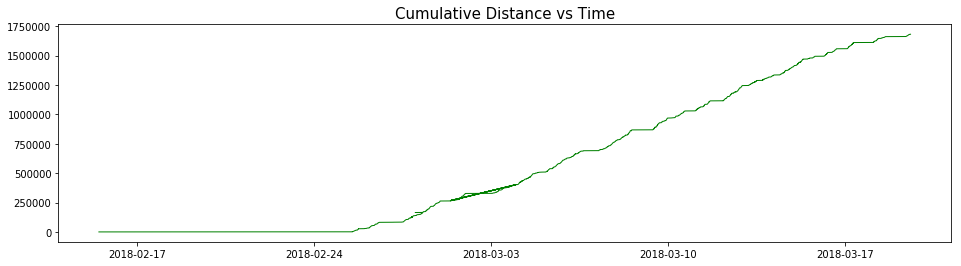

In [20]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(date1, df1.distance, 'g-', markersize = 2, linewidth = 1);
plt.title("Cumulative Distance vs Time", fontsize = 15)

# plt.subplot(6,1,2)
# plt.plot(date2, df2.distance, 'g-', markersize = 2, linewidth = 1);




In [21]:
loadData()

### Data Cleaning

#### 1. Setting Datetime datatype for all datasets, depending upon type of date format written

In [22]:


def formatDate():
    global df1,df2,df3,df4,df5,df6 
    df1.datetime = df1.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
#     df2.datetime = df2.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )
#     df3.datetime = df3.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S") )

formatDate()



#### 2. Sorting data as per DATETIME

In [23]:
def sortDate():
    global df1,df2,df3,df4,df5,df6 
    df1 = df1.sort_values(['datetime'], ascending= True)
#     df2 = df2.sort_values(['datetime'], ascending= True)
#     df3 = df3.sort_values(['datetime'], ascending= True)

sortDate()

#### 3. Removing Outliars

In [36]:
def removeOutliar():
    global df1,df2,df3,df4,df5,df6
    date1 = datetime.datetime(2018,2,26)
    df1 = df1[df1['datetime'] >= date1]
    df1 = df1[df1.fuelVoltage <= 600]

#     date2 = datetime.datetime(2018,1,26)
#     df2 = df2[df2['datetime'] >= date2]
#     df2 = df2[df2.fuelVoltage <= 600]

    
removeOutliar()

#### 4. Resetting Index

In [37]:
def resetIndex():
    global df1,df2,df3,df4,df5,df6
    df1 = df1.reset_index(drop=True)
#     df2 = df2.reset_index(drop=True)
#     df3 = df3.reset_index(drop=True)

    
resetIndex()

#### 5. Normalising Data

In [38]:
def normalData():
    global df1,df2,df3,df4,df5,df6
    
    def norm(df):
        df.distance= df.distance/df.distance.max()
        df.fuelVoltage = df.fuelVoltage/df.fuelVoltage.max()
        return df

    df1 = norm(df1)
#     df2 = norm(df2)
#     df3 = norm(df3)

normalData()

In [39]:
datetime.datetime(2016,5,1).month

5

## Analysing Changes

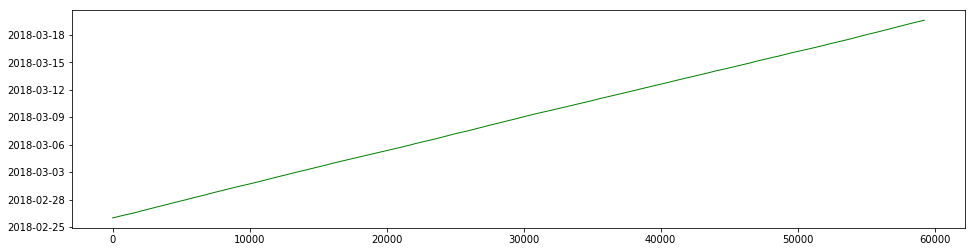

In [40]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df1.index, df1.datetime, 'g-', markersize = 1, linewidth = 1);

# plt.subplot(6,1,2)
# plt.plot(df2.index, df2.datetime, 'g.', markersize = 1, linewidth = 1);



Text(0.5,1,'Cumulative Distance vs Time')

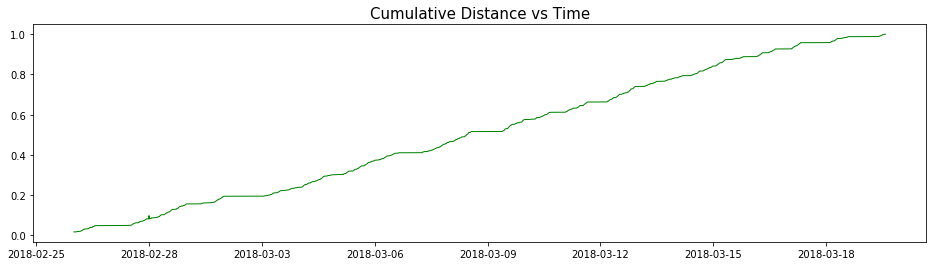

In [41]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df1.datetime, df1.distance, 'g-', markersize = 2, linewidth = 1);
plt.title("Cumulative Distance vs Time", fontsize = 15)



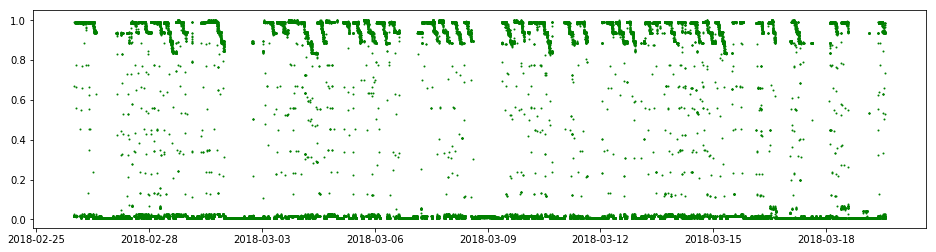

In [42]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(df1.datetime, df1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig("Conti/Level1.png")


### Removing 'device_state' = OFF rows

In [43]:
df1['dev_state'] = df1['dev_state'].apply(lambda x: int(x))
# df2['dev_state'] = df2['dev_state'].apply(lambda x: int(x))
# df3['dev_state'] = df3['dev_state'].apply(lambda x: int(x))

       
dff1 = df1[df1['dev_state'] ==1]
# dff2 = df2[df2['dev_state'] ==1]
# dff3 = df3[df3['dev_state'] ==1]


In [44]:
dff1.head()
dff1 = dff1.reset_index(drop=True)
# dff2 = dff2.reset_index(drop=True)
# dff3 = dff3.reset_index(drop=True)
# dff4 = dff4.reset_index(drop=True)
# dff5 = dff5.reset_index(drop=True)
# dff6 = dff6.reset_index(drop=True)


### Plotting ON State Data

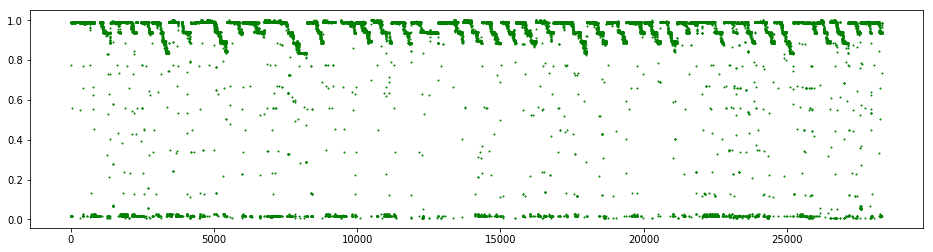

In [45]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

# plt.subplot(6,1,2)
# plt.plot( dff2.index, dff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Level2.2.png')


### Removing probable errorenous data  and Plotting

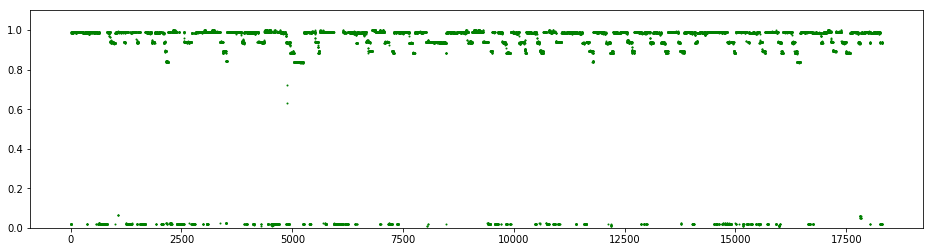

In [46]:
def rem_ErrData(dff, level):   
    x = np.array(dff.index)
    y = np.array(dff.fuelVoltage)
     
    from sympy.geometry import Point
    i=0
    dd000 = [0,0,0,0]
    dd00 = [0,0,0]
    dd0 = [0,0]
    dd1 = [0]

    dd2 = [y[1]-y[0]]
    dd3 = [y[2]-y[0]]
    dd4 = [y[3]-y[0]]
    dd5 = [y[4]-y[0]]
    
    for i in range(1,len(x)):   
        try:
            d000 = abs(y[i] - y[i-4])
            d00 = abs(y[i] - y[i-3])
            d0 = abs(y[i] - y[i-2])
            d1 = abs(y[i] - y[i-1])
            d2 = abs(y[i+1] - y[i])
            d3 = abs(y[i+2] - y[i])
            d4 = abs(y[i+3] - y[i])
            d5 = abs(y[i+4] - y[i])
        except:
            continue
        
        dd000.append(d000)
        dd00.append(d00)
        dd0.append(d0)   
        dd1.append(d1)
        dd2.append(d2)
        dd3.append(d3)
        dd4.append(d4)
        dd5.append(d5)
        
        #print (i)

   # dd1.append(0)
   # dd2.append(0)
    dff['dd000'] = pd.Series(dd000)
    dff['dd00'] = pd.Series(dd00)
    dff['dd0'] = pd.Series(dd0)  
    dff['dd1'] = pd.Series(dd1)
    dff['dd2'] = pd.Series(dd2)
    dff['dd3'] = pd.Series(dd3)
    dff['dd4'] = pd.Series(dd4)
    dff['dd5'] = pd.Series(dd5)
    
    
    ## Removing Error Data
    if level ==1 :
        dff = dff[(dff.dd1<=0.005)  & (dff.dd2<=0.005) & (dff.dd0<=0.01)  & (dff.dd3<=0.01)]
        dff = dff.reset_index(drop=True) ## Reseting index

    if level ==2 :
        dff = dff[(dff.dd1<=0.005)  & (dff.dd2<=0.005) & (dff.dd0<=0.01)  & (dff.dd3<=0.01)]
        dff = dff.reset_index(drop=True) ## Reseting index
        
    if level ==3 :
        dff = dff[(dff.dd1<=0.005)&(dff.dd2<=0.005) & (dff.dd0<=0.01)&(dff.dd3<=0.01) & 
                  (dff.dd00<=0.015)&(dff.dd4<=0.015)]
        dff = dff.reset_index(drop=True) ## Reseting index
    
    if level ==4 :
        dff = dff[(dff.dd1<=0.005)&(dff.dd2<=0.005) & (dff.dd0<=0.01)&(dff.dd3<=0.01) & 
                  (dff.dd00<=0.015)&(dff.dd4<=0.015) & (dff.dd000<=0.02)&(dff.dd5<=0.02)]
        dff = dff.reset_index(drop=True) ## Reseting index


    ##Plotting Final data
    plt.rcParams['figure.figsize'] = [16,4]
    plt.plot( dff.index[:], dff.fuelVoltage[:], 'g.', markersize = 2, linewidth = 1);
    plt.ylim(0,1.1)
    
   
    return dff

rem_ErrData(dff1,1);

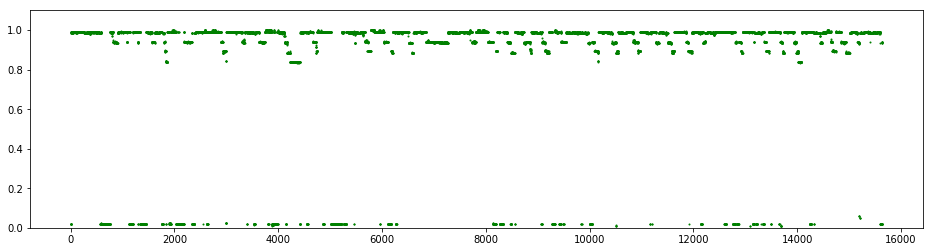

In [47]:
dfl4 = rem_ErrData(dff1,4);


In [26]:
#a = dfff1[dfff1.dd1>0.05]

### Identifying probable datajump points

In [48]:
def theft_point(dff):   
    x = np.array(dff.index)
    y = np.array(dff.fuelVoltage)
    
    theft_pts = []

    from sympy.geometry import Point
    i=0
    dd1 = [0]

    dd2 = [y[1]-y[0]]
    for i in range(1,len(x)):   
        try:
#             d1 =abs(y[i+1] - y[i])
#             d2 =abs(y[i+2] - y[i])
#             d3 =abs(y[i+3] - y[i])
#             d4 =abs(y[i+4] - y[i])
#             d5 =abs(y[i+4] - y[i])
            
            d_forward = abs(y[i+1:i+20] -y[i])
            d_backward = abs(y[i-21:i-1] -y[i])
            #print (d_backward)
        except:
            print ("**")
        #dd1.append(d1)
        #dd2.append(d2)
        #if (d1 >= 0.05) & (d2 >= 0.05)&(d3 >= 0.05)&(d4 >= 0.05)&(d5 >= 0.05)&(d5 >= 0.05):
        if (sum(d_forward>0.05) == 19) & (sum(d_forward<0.25) == 19):
            if (sum(d_backward<0.05) ==20):
                theft_pts.append(dff.index[i])
        #print (i)

   # dd1.append(0)
   # dd2.append(0)    
    #dff['dd1'] = pd.Series(dd1)
    #dff['dd2'] = pd.Series(dd2)
    return theft_pts
    

In [49]:
theftpts = theft_point(dfl4[:]);
dfl4.to_csv("Test.csv");


In [50]:
len(dff1),len(dfff1), (theftpts)

NameError: name 'dfff1' is not defined

In [51]:
a = abs(np.array([1,-1,1,2,3]))
a[1:1+3]

array([1, 1, 2])

In [52]:
d_backward = pd.Series([0,0,0,0])
d_backward <0.05

0    True
1    True
2    True
3    True
dtype: bool

In [53]:
theftpts

[903,
 1563,
 1618,
 1863,
 3351,
 3741,
 4750,
 5780,
 6205,
 6512,
 6606,
 6847,
 7266,
 7807,
 8037,
 8221,
 8730,
 8878,
 9215,
 9973,
 10166,
 10553,
 10978,
 11277,
 11333,
 11634,
 11969,
 12948,
 13453,
 13750,
 13939,
 13985,
 14023,
 14084,
 14743,
 15011]

In [54]:
dfl4.datetime[theftpts]

903     2018-02-27 10:02:05
1563    2018-02-28 06:59:34
1618    2018-02-28 09:18:25
1863    2018-02-28 17:11:47
3351    2018-03-03 09:15:11
3741    2018-03-03 15:54:31
4750    2018-03-04 15:40:14
5780    2018-03-05 15:26:17
6205    2018-03-06 00:59:17
6512    2018-03-06 05:39:39
6606    2018-03-06 07:44:04
6847    2018-03-06 12:05:12
7266    2018-03-07 05:59:53
7807    2018-03-07 15:23:21
8037    2018-03-07 19:31:53
8221    2018-03-07 23:37:01
8730    2018-03-08 11:21:33
8878    2018-03-09 09:09:40
9215    2018-03-09 17:01:06
9973    2018-03-10 11:57:56
10166   2018-03-10 15:45:04
10553   2018-03-11 08:53:52
10978   2018-03-11 15:37:05
11277   2018-03-12 07:41:43
11333   2018-03-12 09:40:22
11634   2018-03-12 16:45:01
11969   2018-03-13 04:06:31
12948   2018-03-14 01:10:12
13453   2018-03-14 17:00:49
13750   2018-03-15 01:12:41
13939   2018-03-15 03:13:16
13985   2018-03-15 05:50:37
14023   2018-03-15 06:44:06
14084   2018-03-15 07:55:16
14743   2018-03-17 01:42:49
15011   2018-03-18 0

### Plotting Cleaned Data with Cumulative Distance (Normalised)

In [55]:
#### Removing  Noise below 0.3 level
##########################################
dfff1 = dfff1[dfff1.fuelVoltage > 0.3]
dfff1 = dfff1.reset_index(drop= True)

NameError: name 'dfff1' is not defined

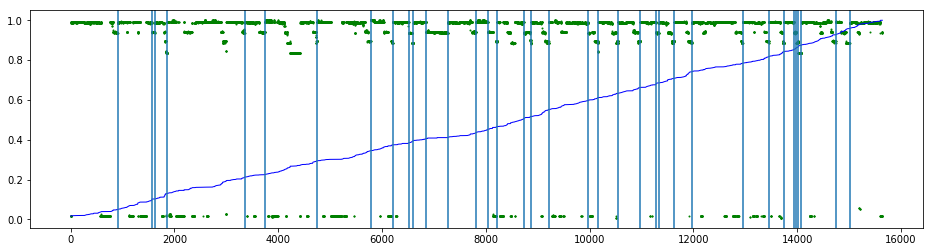

In [56]:
plt.rcParams['figure.figsize'] = [16,4]
#plt.subplot(6,1,1)
plt.plot(dfl4.index, dfl4.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.plot(dfl4.index, dfl4.distance, 'b-', markersize = 2, linewidth = 1);
#plt.xlim(8445,8470)
for pt in theftpts:
    plt.axvline(pt)

### Predicting Missing Values 
##### Predicting missing data in the final cleaned data when compared to initial fuel dataset 

In [156]:

def predit_MissingData(df_old, df_cleaned):
    j=0
    predict_Data = []
    lastdata_value = 0
    i=0
    lastdata_value =  df_old.loc[0,'fuelVoltage']
    
    while i <(len(df_old)):

            try:   
                if (df_cleaned.loc[j,'datetime'] > df_old.loc[i,'datetime']):
                    predict_Data.append(lastdata_value)
                    print ('i = ',i)

                elif (df_cleaned.loc[j,'datetime']== df_old.loc[i,'datetime']):
                    lastdata_value =  df_cleaned.loc[i,'fuelVoltage']
                    j+=1
                    predict_Data.append(lastdata_value)
                    print ('*j = ',j)
            except Exception as e:
                    predict_Data.append(df_old.loc[i,'fuelVoltage'])
                    print (i)
                    print (e)

        i+=1
    
    return predict_Data



predict_Data = predit_MissingData(df1, dfl4)  
         
        
        

i =  0
i =  1
i =  2
i =  3
i =  4
*j =  1
i =  6
*j =  2
i =  8
i =  9
i =  10
*j =  3
*j =  4
*j =  5
*j =  6
*j =  7
*j =  8
*j =  9
*j =  10
i =  19
i =  20
*j =  11
*j =  12
*j =  13
*j =  14
*j =  15
i =  26
i =  27
i =  28
i =  29
i =  30
i =  31
i =  32
i =  33
i =  34
i =  35
i =  36
i =  37
i =  38
i =  39
i =  40
i =  41
i =  42
i =  43
i =  44
i =  45
i =  46
i =  47
i =  48
i =  49
i =  50
i =  51
i =  52
i =  53
i =  54
i =  55
i =  56
i =  57
i =  58
i =  59
i =  60
i =  61
i =  62
i =  63
i =  64
i =  65
i =  66
i =  67
i =  68
i =  69
i =  70
i =  71
i =  72
i =  73
i =  74
i =  75
i =  76
i =  77
i =  78
i =  79
i =  80
i =  81
i =  82
i =  83
i =  84
i =  85
i =  86
i =  87
i =  88
i =  89
i =  90
i =  91
i =  92
i =  93
i =  94
i =  95
i =  96
i =  97
i =  98
i =  99
i =  100
i =  101
i =  102
i =  103
i =  104
i =  105
i =  106
i =  107
i =  108
i =  109
i =  110
i =  111
i =  112
i =  113
i =  114
i =  115
i =  116
i =  117
i =  118
i =  119
i =  120
i =  121
i = 

i =  1200
i =  1201
i =  1202
i =  1203
i =  1204
i =  1205
i =  1206
i =  1207
i =  1208
i =  1209
i =  1210
i =  1211
i =  1212
i =  1213
i =  1214
i =  1215
i =  1216
i =  1217
i =  1218
i =  1219
i =  1220
i =  1221
i =  1222
i =  1223
i =  1224
i =  1225
*j =  590
*j =  591
*j =  592
*j =  593
*j =  594
*j =  595
*j =  596
*j =  597
*j =  598
*j =  599
*j =  600
*j =  601
*j =  602
*j =  603
*j =  604
*j =  605
*j =  606
*j =  607
*j =  608
i =  1245
i =  1246
*j =  609
*j =  610
*j =  611
i =  1250
i =  1251
*j =  612
*j =  613
*j =  614
*j =  615
*j =  616
*j =  617
*j =  618
*j =  619
*j =  620
*j =  621
*j =  622
*j =  623
*j =  624
i =  1265
i =  1266
i =  1267
i =  1268
i =  1269
i =  1270
i =  1271
i =  1272
i =  1273
i =  1274
i =  1275
i =  1276
*j =  625
i =  1278
*j =  626
i =  1280
*j =  627
*j =  628
*j =  629
*j =  630
*j =  631
*j =  632
*j =  633
*j =  634
*j =  635
*j =  636
*j =  637
*j =  638
*j =  639
i =  1294
i =  1295
*j =  640
*j =  641
*j =  642
*j =  643


i =  2199
i =  2200
i =  2201
i =  2202
i =  2203
i =  2204
i =  2205
i =  2206
i =  2207
i =  2208
i =  2209
i =  2210
i =  2211
i =  2212
i =  2213
i =  2214
i =  2215
i =  2216
i =  2217
i =  2218
i =  2219
i =  2220
i =  2221
i =  2222
i =  2223
i =  2224
i =  2225
i =  2226
i =  2227
i =  2228
i =  2229
i =  2230
i =  2231
i =  2232
i =  2233
i =  2234
i =  2235
i =  2236
i =  2237
i =  2238
i =  2239
i =  2240
i =  2241
i =  2242
i =  2243
i =  2244
i =  2245
i =  2246
i =  2247
i =  2248
i =  2249
i =  2250
i =  2251
i =  2252
i =  2253
i =  2254
i =  2255
i =  2256
i =  2257
i =  2258
i =  2259
i =  2260
i =  2261
i =  2262
i =  2263
i =  2264
i =  2265
i =  2266
i =  2267
i =  2268
i =  2269
i =  2270
i =  2271
i =  2272
i =  2273
i =  2274
i =  2275
i =  2276
i =  2277
i =  2278
i =  2279
i =  2280
i =  2281
i =  2282
i =  2283
i =  2284
i =  2285
i =  2286
i =  2287
i =  2288
i =  2289
i =  2290
i =  2291
i =  2292
i =  2293
i =  2294
i =  2295
i =  2296
i =  2297
i =  2298


i =  3199
i =  3200
i =  3201
i =  3202
i =  3203
i =  3204
i =  3205
i =  3206
i =  3207
i =  3208
i =  3209
i =  3210
i =  3211
i =  3212
i =  3213
i =  3214
i =  3215
i =  3216
i =  3217
i =  3218
i =  3219
i =  3220
i =  3221
i =  3222
i =  3223
i =  3224
i =  3225
i =  3226
i =  3227
i =  3228
i =  3229
i =  3230
i =  3231
i =  3232
i =  3233
i =  3234
i =  3235
i =  3236
i =  3237
i =  3238
i =  3239
i =  3240
i =  3241
i =  3242
i =  3243
i =  3244
i =  3245
i =  3246
i =  3247
i =  3248
i =  3249
i =  3250
i =  3251
i =  3252
i =  3253
i =  3254
i =  3255
i =  3256
i =  3257
i =  3258
i =  3259
i =  3260
i =  3261
i =  3262
i =  3263
i =  3264
i =  3265
i =  3266
i =  3267
i =  3268
i =  3269
i =  3270
i =  3271
i =  3272
i =  3273
i =  3274
i =  3275
i =  3276
i =  3277
i =  3278
i =  3279
i =  3280
i =  3281
i =  3282
i =  3283
i =  3284
i =  3285
i =  3286
i =  3287
i =  3288
i =  3289
i =  3290
i =  3291
i =  3292
i =  3293
i =  3294
i =  3295
i =  3296
i =  3297
i =  3298


*j =  1025
*j =  1026
*j =  1027
*j =  1028
*j =  1029
*j =  1030
*j =  1031
*j =  1032
*j =  1033
*j =  1034
*j =  1035
*j =  1036
*j =  1037
*j =  1038
*j =  1039
i =  4213
i =  4214
i =  4215
i =  4216
*j =  1040
*j =  1041
*j =  1042
*j =  1043
i =  4221
i =  4222
*j =  1044
*j =  1045
*j =  1046
*j =  1047
*j =  1048
*j =  1049
i =  4229
i =  4230
i =  4231
i =  4232
i =  4233
i =  4234
i =  4235
i =  4236
i =  4237
i =  4238
i =  4239
i =  4240
i =  4241
i =  4242
i =  4243
i =  4244
i =  4245
i =  4246
i =  4247
i =  4248
i =  4249
i =  4250
i =  4251
i =  4252
i =  4253
i =  4254
i =  4255
i =  4256
i =  4257
i =  4258
i =  4259
i =  4260
i =  4261
i =  4262
i =  4263
i =  4264
i =  4265
i =  4266
i =  4267
i =  4268
i =  4269
i =  4270
i =  4271
i =  4272
i =  4273
*j =  1050
i =  4275
i =  4276
i =  4277
i =  4278
*j =  1051
*j =  1052
*j =  1053
*j =  1054
*j =  1055
*j =  1056
*j =  1057
*j =  1058
*j =  1059
*j =  1060
*j =  1061
*j =  1062
*j =  1063
*j =  1064
*j =  1065

i =  5447
i =  5448
i =  5449
i =  5450
i =  5451
i =  5452
i =  5453
i =  5454
i =  5455
i =  5456
i =  5457
i =  5458
i =  5459
i =  5460
i =  5461
i =  5462
i =  5463
i =  5464
i =  5465
i =  5466
i =  5467
i =  5468
i =  5469
i =  5470
i =  5471
i =  5472
i =  5473
i =  5474
i =  5475
i =  5476
i =  5477
i =  5478
i =  5479
i =  5480
i =  5481
i =  5482
i =  5483
i =  5484
i =  5485
i =  5486
i =  5487
i =  5488
i =  5489
i =  5490
i =  5491
i =  5492
i =  5493
i =  5494
i =  5495
i =  5496
i =  5497
i =  5498
i =  5499
i =  5500
i =  5501
i =  5502
i =  5503
i =  5504
i =  5505
i =  5506
i =  5507
i =  5508
i =  5509
i =  5510
i =  5511
i =  5512
i =  5513
i =  5514
i =  5515
i =  5516
i =  5517
i =  5518
i =  5519
i =  5520
i =  5521
i =  5522
i =  5523
i =  5524
i =  5525
i =  5526
i =  5527
i =  5528
i =  5529
i =  5530
i =  5531
i =  5532
i =  5533
i =  5534
i =  5535
i =  5536
i =  5537
i =  5538
i =  5539
i =  5540
i =  5541
i =  5542
i =  5543
i =  5544
i =  5545
i =  5546


i =  6447
i =  6448
i =  6449
i =  6450
i =  6451
i =  6452
i =  6453
i =  6454
i =  6455
i =  6456
i =  6457
i =  6458
i =  6459
i =  6460
i =  6461
i =  6462
i =  6463
i =  6464
i =  6465
i =  6466
i =  6467
i =  6468
i =  6469
i =  6470
i =  6471
i =  6472
i =  6473
i =  6474
i =  6475
i =  6476
i =  6477
i =  6478
i =  6479
i =  6480
i =  6481
i =  6482
i =  6483
i =  6484
i =  6485
i =  6486
i =  6487
i =  6488
i =  6489
i =  6490
i =  6491
i =  6492
i =  6493
i =  6494
i =  6495
i =  6496
i =  6497
i =  6498
i =  6499
i =  6500
i =  6501
i =  6502
i =  6503
i =  6504
i =  6505
i =  6506
i =  6507
i =  6508
i =  6509
i =  6510
i =  6511
i =  6512
i =  6513
i =  6514
*j =  1463
i =  6516
*j =  1464
*j =  1465
*j =  1466
*j =  1467
*j =  1468
*j =  1469
i =  6523
i =  6524
*j =  1470
*j =  1471
*j =  1472
i =  6528
i =  6529
i =  6530
i =  6531
i =  6532
i =  6533
i =  6534
i =  6535
i =  6536
*j =  1473
*j =  1474
*j =  1475
*j =  1476
*j =  1477
*j =  1478
*j =  1479
*j =  1480
*j

*j =  1600
i =  7447
i =  7448
i =  7449
i =  7450
i =  7451
i =  7452
i =  7453
i =  7454
i =  7455
i =  7456
*j =  1601
i =  7458
*j =  1602
i =  7460
*j =  1603
*j =  1604
*j =  1605
i =  7464
i =  7465
i =  7466
i =  7467
i =  7468
i =  7469
i =  7470
i =  7471
i =  7472
i =  7473
i =  7474
i =  7475
i =  7476
i =  7477
i =  7478
i =  7479
i =  7480
i =  7481
i =  7482
i =  7483
i =  7484
i =  7485
i =  7486
i =  7487
i =  7488
i =  7489
i =  7490
i =  7491
i =  7492
i =  7493
i =  7494
i =  7495
i =  7496
i =  7497
i =  7498
i =  7499
i =  7500
i =  7501
i =  7502
i =  7503
i =  7504
i =  7505
i =  7506
i =  7507
i =  7508
i =  7509
i =  7510
i =  7511
i =  7512
i =  7513
i =  7514
i =  7515
i =  7516
i =  7517
i =  7518
i =  7519
i =  7520
i =  7521
i =  7522
i =  7523
i =  7524
i =  7525
i =  7526
i =  7527
i =  7528
i =  7529
i =  7530
i =  7531
i =  7532
i =  7533
i =  7534
i =  7535
i =  7536
i =  7537
i =  7538
i =  7539
i =  7540
i =  7541
i =  7542
i =  7543
i =  7544
i = 

i =  8446
i =  8447
i =  8448
i =  8449
i =  8450
i =  8451
i =  8452
i =  8453
i =  8454
i =  8455
i =  8456
i =  8457
i =  8458
i =  8459
i =  8460
i =  8461
i =  8462
i =  8463
i =  8464
i =  8465
i =  8466
i =  8467
i =  8468
i =  8469
i =  8470
i =  8471
i =  8472
i =  8473
i =  8474
i =  8475
i =  8476
i =  8477
i =  8478
i =  8479
i =  8480
i =  8481
i =  8482
i =  8483
i =  8484
i =  8485
i =  8486
i =  8487
i =  8488
i =  8489
i =  8490
i =  8491
i =  8492
i =  8493
i =  8494
i =  8495
i =  8496
i =  8497
i =  8498
i =  8499
i =  8500
i =  8501
i =  8502
i =  8503
i =  8504
i =  8505
i =  8506
i =  8507
i =  8508
i =  8509
i =  8510
i =  8511
i =  8512
i =  8513
i =  8514
i =  8515
i =  8516
i =  8517
i =  8518
i =  8519
i =  8520
i =  8521
i =  8522
i =  8523
i =  8524
i =  8525
i =  8526
i =  8527
i =  8528
i =  8529
i =  8530
*j =  1683
*j =  1684
*j =  1685
*j =  1686
*j =  1687
*j =  1688
*j =  1689
*j =  1690
*j =  1691
*j =  1692
*j =  1693
*j =  1694
*j =  1695
*j =  1

i =  9445
i =  9446
i =  9447
i =  9448
i =  9449
i =  9450
i =  9451
i =  9452
i =  9453
i =  9454
i =  9455
i =  9456
i =  9457
i =  9458
i =  9459
i =  9460
i =  9461
i =  9462
i =  9463
i =  9464
i =  9465
i =  9466
i =  9467
i =  9468
i =  9469
i =  9470
i =  9471
i =  9472
i =  9473
i =  9474
i =  9475
i =  9476
i =  9477
i =  9478
i =  9479
i =  9480
i =  9481
i =  9482
i =  9483
i =  9484
i =  9485
i =  9486
i =  9487
i =  9488
i =  9489
i =  9490
i =  9491
i =  9492
i =  9493
i =  9494
i =  9495
i =  9496
i =  9497
i =  9498
i =  9499
i =  9500
i =  9501
i =  9502
i =  9503
i =  9504
i =  9505
i =  9506
i =  9507
i =  9508
i =  9509
i =  9510
i =  9511
i =  9512
i =  9513
i =  9514
i =  9515
i =  9516
i =  9517
i =  9518
i =  9519
i =  9520
i =  9521
i =  9522
i =  9523
i =  9524
i =  9525
i =  9526
i =  9527
i =  9528
i =  9529
i =  9530
i =  9531
i =  9532
i =  9533
i =  9534
i =  9535
i =  9536
i =  9537
i =  9538
i =  9539
i =  9540
i =  9541
i =  9542
i =  9543
i =  9544


i =  10445
i =  10446
i =  10447
i =  10448
i =  10449
i =  10450
i =  10451
i =  10452
i =  10453
i =  10454
i =  10455
i =  10456
i =  10457
i =  10458
i =  10459
i =  10460
i =  10461
i =  10462
i =  10463
i =  10464
i =  10465
i =  10466
i =  10467
i =  10468
i =  10469
i =  10470
i =  10471
i =  10472
i =  10473
i =  10474
i =  10475
i =  10476
i =  10477
i =  10478
i =  10479
i =  10480
i =  10481
i =  10482
i =  10483
i =  10484
i =  10485
i =  10486
i =  10487
i =  10488
i =  10489
i =  10490
i =  10491
i =  10492
i =  10493
i =  10494
i =  10495
i =  10496
i =  10497
i =  10498
i =  10499
i =  10500
i =  10501
i =  10502
i =  10503
i =  10504
i =  10505
i =  10506
i =  10507
i =  10508
i =  10509
i =  10510
i =  10511
i =  10512
i =  10513
i =  10514
i =  10515
i =  10516
i =  10517
i =  10518
i =  10519
i =  10520
i =  10521
i =  10522
i =  10523
i =  10524
i =  10525
i =  10526
i =  10527
i =  10528
i =  10529
i =  10530
i =  10531
i =  10532
i =  10533
i =  10534
i =  10535

i =  11444
i =  11445
i =  11446
i =  11447
i =  11448
i =  11449
i =  11450
i =  11451
i =  11452
i =  11453
i =  11454
i =  11455
i =  11456
i =  11457
i =  11458
i =  11459
i =  11460
i =  11461
i =  11462
i =  11463
i =  11464
i =  11465
i =  11466
i =  11467
i =  11468
i =  11469
i =  11470
i =  11471
i =  11472
i =  11473
i =  11474
i =  11475
i =  11476
i =  11477
i =  11478
i =  11479
*j =  2182
i =  11481
i =  11482
i =  11483
i =  11484
i =  11485
i =  11486
i =  11487
i =  11488
i =  11489
i =  11490
i =  11491
i =  11492
i =  11493
i =  11494
i =  11495
i =  11496
i =  11497
*j =  2183
*j =  2184
*j =  2185
*j =  2186
*j =  2187
i =  11503
i =  11504
i =  11505
i =  11506
i =  11507
i =  11508
i =  11509
i =  11510
i =  11511
i =  11512
i =  11513
i =  11514
i =  11515
i =  11516
i =  11517
i =  11518
i =  11519
i =  11520
i =  11521
i =  11522
i =  11523
i =  11524
i =  11525
i =  11526
i =  11527
i =  11528
i =  11529
i =  11530
i =  11531
i =  11532
i =  11533
i =  11534

i =  12444
i =  12445
i =  12446
i =  12447
i =  12448
i =  12449
i =  12450
i =  12451
i =  12452
i =  12453
i =  12454
i =  12455
i =  12456
i =  12457
i =  12458
i =  12459
i =  12460
i =  12461
i =  12462
i =  12463
i =  12464
i =  12465
i =  12466
i =  12467
i =  12468
i =  12469
i =  12470
i =  12471
i =  12472
i =  12473
i =  12474
i =  12475
i =  12476
i =  12477
i =  12478
i =  12479
i =  12480
i =  12481
i =  12482
i =  12483
i =  12484
i =  12485
i =  12486
i =  12487
i =  12488
i =  12489
i =  12490
i =  12491
i =  12492
i =  12493
i =  12494
i =  12495
i =  12496
i =  12497
i =  12498
i =  12499
i =  12500
i =  12501
i =  12502
i =  12503
i =  12504
i =  12505
i =  12506
i =  12507
i =  12508
i =  12509
i =  12510
i =  12511
i =  12512
i =  12513
i =  12514
i =  12515
i =  12516
i =  12517
i =  12518
i =  12519
i =  12520
i =  12521
i =  12522
i =  12523
i =  12524
i =  12525
i =  12526
i =  12527
i =  12528
i =  12529
i =  12530
i =  12531
i =  12532
i =  12533
i =  12534

In [157]:
len(predict_Data), len(df1), len(dfl4)

(12880, 65407, 12767)

### Final Plot
Plotting Original Data, CLeaned Data, Cleaned Data with Prediction,  CLeaned Data (Excluding Zero and Static Zone)

ValueError: x and y must have same first dimension, but have shapes (65407,) and (12880,)

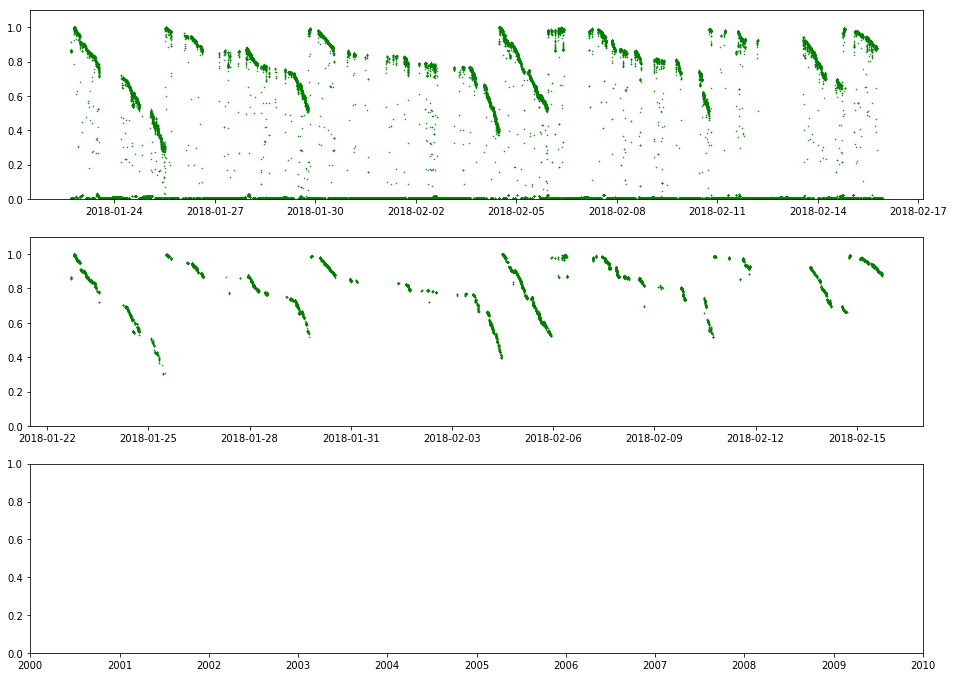

In [142]:
plt.rcParams['figure.figsize'] = [16,16]

plt.subplot(4,1,1)
plt.plot(df1.datetime, df1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
#plt.xlim(0,3200)
plt.ylim(0,1.1)

plt.subplot(4,1,2)
plt.plot(dfl4.datetime, dfl4.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.ylim(0,1.1)

plt.subplot(4,1,3)
plt.plot(df1.datetime, predict_Data, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfl4.datetime, dfl4.distance, 'b-', markersize = 1, linewidth = 1);


plt.subplot(4,1,4)
plt.plot(dfl4.index, dfl4.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfl4.index, dfl4.distance, 'b-', markersize = 1, linewidth = 1);
#plt.xlim(0,3200)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.1.png')


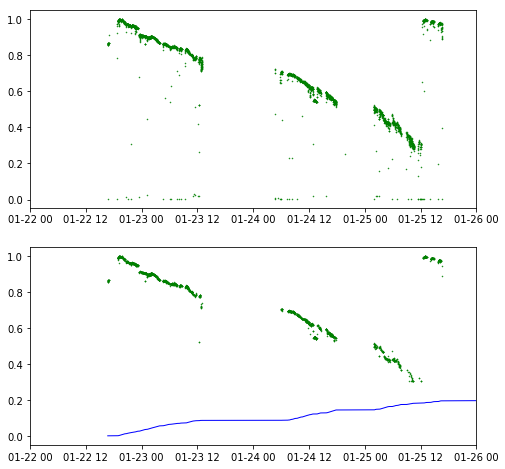

In [79]:
plt.rcParams['figure.figsize'] = [8,8]

plt.subplot(2,1,1)
plt.plot(dff1.datetime, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(datetime.datetime(2018,1,22), datetime.datetime(2018,1,26))
#plt.ylim(0.6,1.1)

plt.subplot(2,1,2)
plt.plot(dfff1.datetime, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.datetime, dfff1.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(datetime.datetime(2018,1,22), datetime.datetime(2018,1,26))
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.2.png')

(0, 4050)

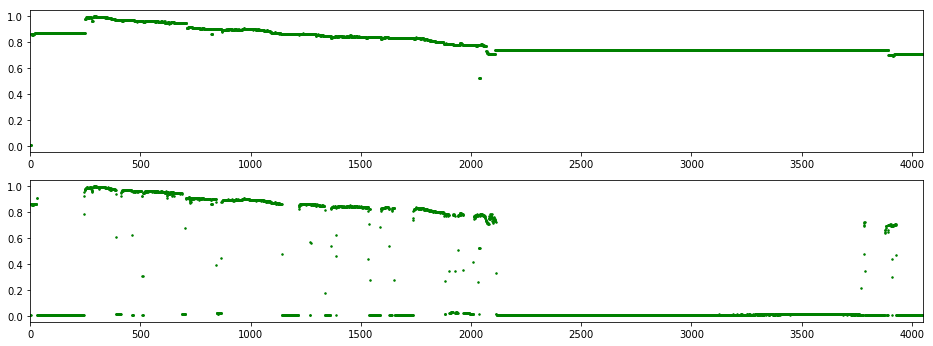

In [102]:
plt.subplot(4,1,3)
plt.plot(df1.index, fdt, 'g.', markersize = 3, linewidth = 1);
plt.xlim(0,4050)

plt.subplot(4,1,4)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 3, linewidth = 1);
plt.xlim(0,4050)


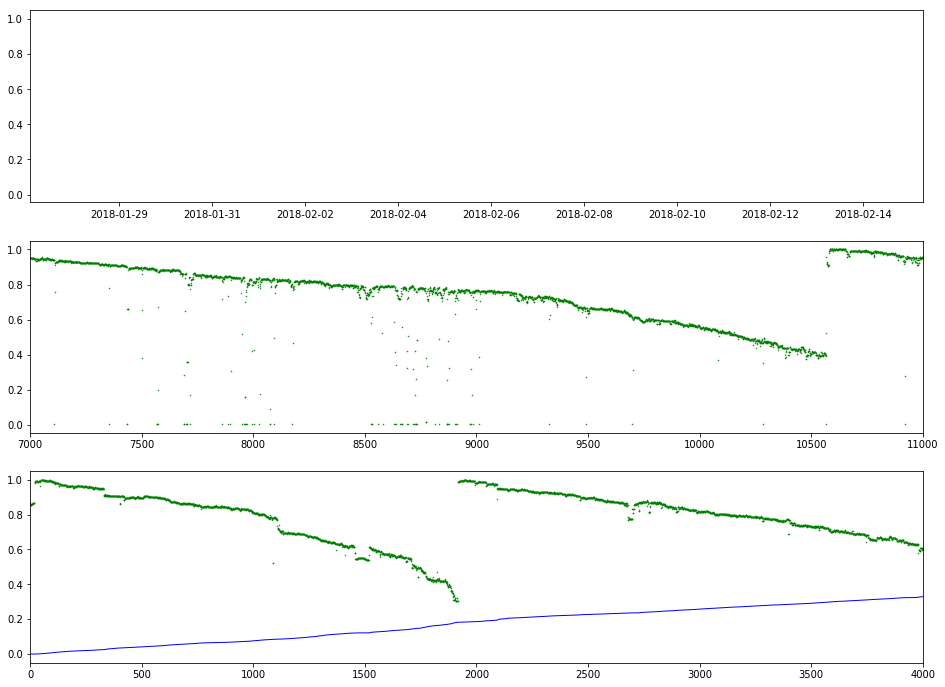

In [80]:
plt.rcParams['figure.figsize'] = [16,12]

plt.subplot(3,1,1)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

plt.subplot(3,1,2)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(7000,11000)
#plt.ylim(0.6,1.1)

plt.subplot(3,1,3)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(0, 4000)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.3.png')

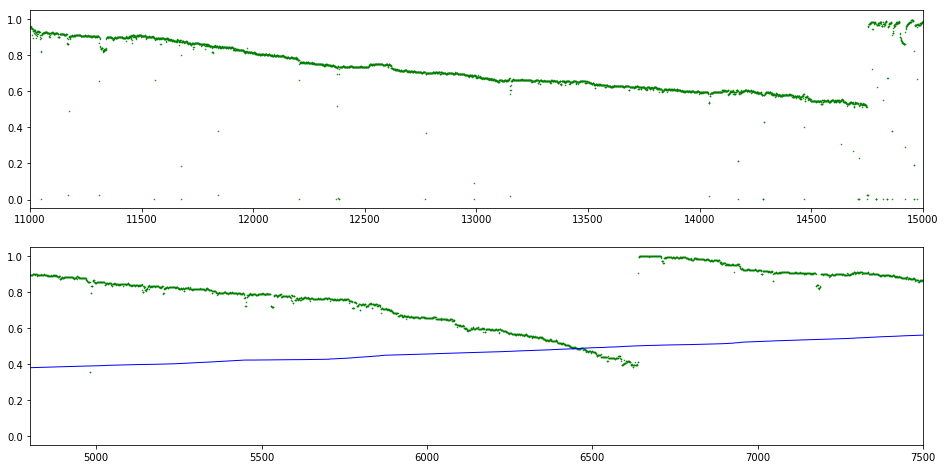

In [56]:
plt.rcParams['figure.figsize'] = [16,8]

plt.subplot(2,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(11000, 15000)
#plt.ylim(0.6,1.1)

plt.subplot(2,1,2)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.distance, 'b-', markersize = 1, linewidth = 1);
plt.xlim(4800, 7500)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.4.png')

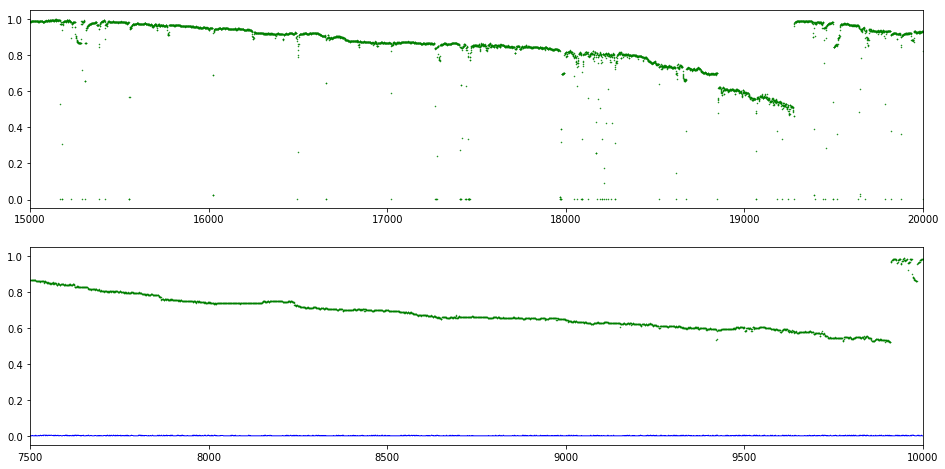

In [57]:
plt.rcParams['figure.figsize'] = [16,8]

plt.subplot(2,1,1)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(15000, 20000)
#plt.ylim(0.6,1.1)

plt.subplot(2,1,2)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.plot(dfff1.index, dfff1.dd1, 'b-', markersize = 1, linewidth = 1);
plt.xlim(7500, 10000)
#plt.ylim(0.6,1.1)
# plt.plot( dfff2.index, dfff2.fuelVoltage, 'g.', markersize = 2, linewidth = 1);


plt.savefig('Conti/Output_Level3.5.png')

(0, 1800)

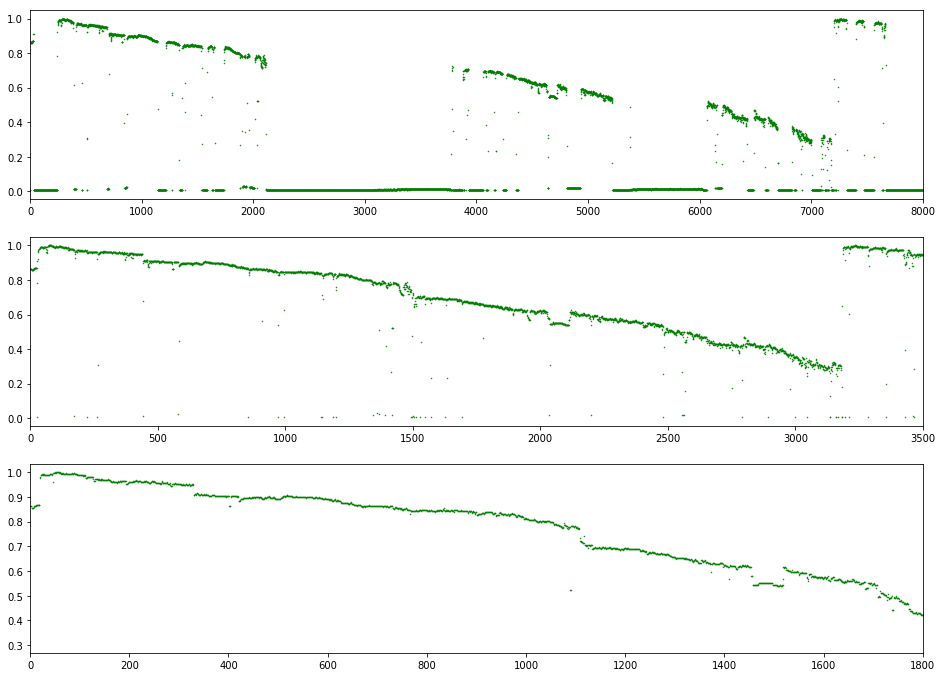

In [58]:
plt.rcParams['figure.figsize'] = [16,16]
plt.subplot(4,1,1)
plt.plot(df1.index, df1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,8000)
#plt.ylim(0.6,1.1)

plt.subplot(4,1,2)
plt.plot(dff1.index, dff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,3500)
#plt.ylim(0.6,1.1)

plt.subplot(4,1,3)
plt.plot(dfff1.index, dfff1.fuelVoltage, 'g.', markersize = 1, linewidth = 1);
plt.xlim(0,1800)

In [35]:
dfff1.head()

,Unnamed: 0,datetime,speed,distance,fuelVoltage,dev_state,dd1,dd2
0,18,2018-01-22 16:43:18,0.0,0,474,1,0.0,-3.0
1,21,2018-01-22 16:44:48,0.0,0,471,1,3.0,0.0
2,22,2018-01-22 16:45:18,0.0,0,471,1,0.0,0.0
3,23,2018-01-22 16:45:48,0.0,0,471,1,0.0,3.0
4,27,2018-01-22 16:47:47,1.8,1,474,1,3.0,0.0


In [37]:
dff1.to_csv("Conti/datafinal_v1_3.csv")
dfff1.to_csv("Conti/datafinal_v1_3.2.csv")
# dff2.to_csv("data/datafinal_v1_2.csv")
# dff3.to_csv("data/datafinal_v1_3.csv")
# dff4.to_csv("data/datafinal_v1_4.csv")
# dff5.to_csv("data/datafinal_v1_5.csv")
# dff6.to_csv("data/datafinal_v1_6.csv")

### Sample Assessement on Data 1
#### 1. Soritng as per date
#### 2. Performing Spectral analysis


In [38]:
df1.datetime = pd.to_datetime(df.datetime)

NameError: name 'df' is not defined

In [ ]:
df.describe()

In [ ]:
df.head(10)

The above line plot donot give a clear picture, about where the maximum datapoints are located. The give a better picture, we will use Box plot  and scatter plot, that will help us in analysing where most of the data points are situated.

Above is the box plot of fuel data

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df.datetime, df.fuelVoltage,'b.' )
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))
plt.title("FuelVoltage vs Time (Sorted)", fontsize= 15)


In [ ]:
plt.plot(df.datetime, df.fuelVoltage,'b-' )
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,17,6,55))

In [ ]:
datetime.datetime(2018,1,22)



### Paasing through Low Pass Butterworth filter. 
We can remove incorrect data by treating them as nose, and passing the time-bound signal through a low pass filter. But before that, it is important to analysis the Spectral plot of the voltage signal, in order to know the range and magnitude of noise frequency.


### Spectral Analysis - Plotting FFT


FFT will help in understanding the different frequency components available in the voltage signal in the form of noise.

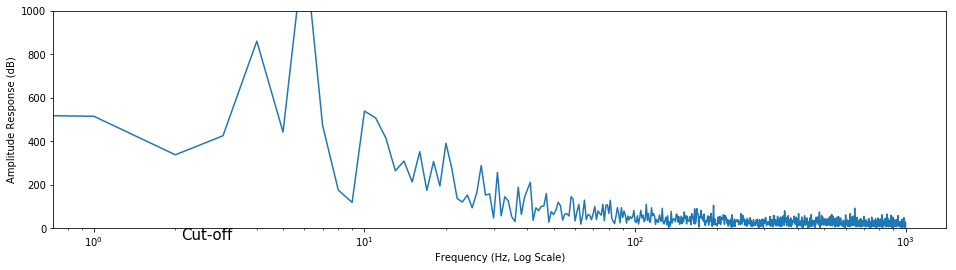

In [41]:
norm_data = dff1.fuelVoltage/dff1.fuelVoltage.max()
yvolt = fft(norm_data)

plt.rcParams['figure.figsize'] = [16,4]
plt.ylim(0,1000);
plt.plot(np.abs(yvolt[:1000]));
plt.rcParams['figure.figsize'] = [16,4]
plt.xscale('log')
plt.ylabel('Amplitude Response (dB)')
plt.xlabel('Frequency (Hz, Log Scale)')
#plt.axvline((2.5, color = 'black')
plt.text(2.1,-50, "Cut-off", fontsize = 15);

Hence most dominant frequency magnitudes are between 1-3 Hz signal, i.e. almost a DC signal. Remaining all are noise in the system. All these noise can be removed using a  low-pass butterworth filter. Hence our cut-off frequency will be 2.5Hz

### SIgnal Filteration


This block defines the lowpass butterworth filter to be used for extracting true signal

In [44]:
def butter_lowpass_filter(data, cutoff, fs, order=5, ftype = False):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=ftype)
    y = lfilter(b, a, data)
    y1 = sg.filtfilt(b,a, data)
    return y

def butter_bandstop_filter(data, lowcut,highcut, fs, order=5, ftype = False):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low,high], btype='bandstop', analog=ftype)
    y = lfilter(b, a, data)
    y1 = sg.filtfilt(b,a, data)
    return y


In [45]:
df1.fuelVoltage.describe()

count    65407.000000
mean         0.278117
std          0.381254
min          0.005455
25%          0.005455
50%          0.005455
75%          0.694545
max          1.000000
Name: fuelVoltage, dtype: float64

### Results

No handles with labels found to put in legend.


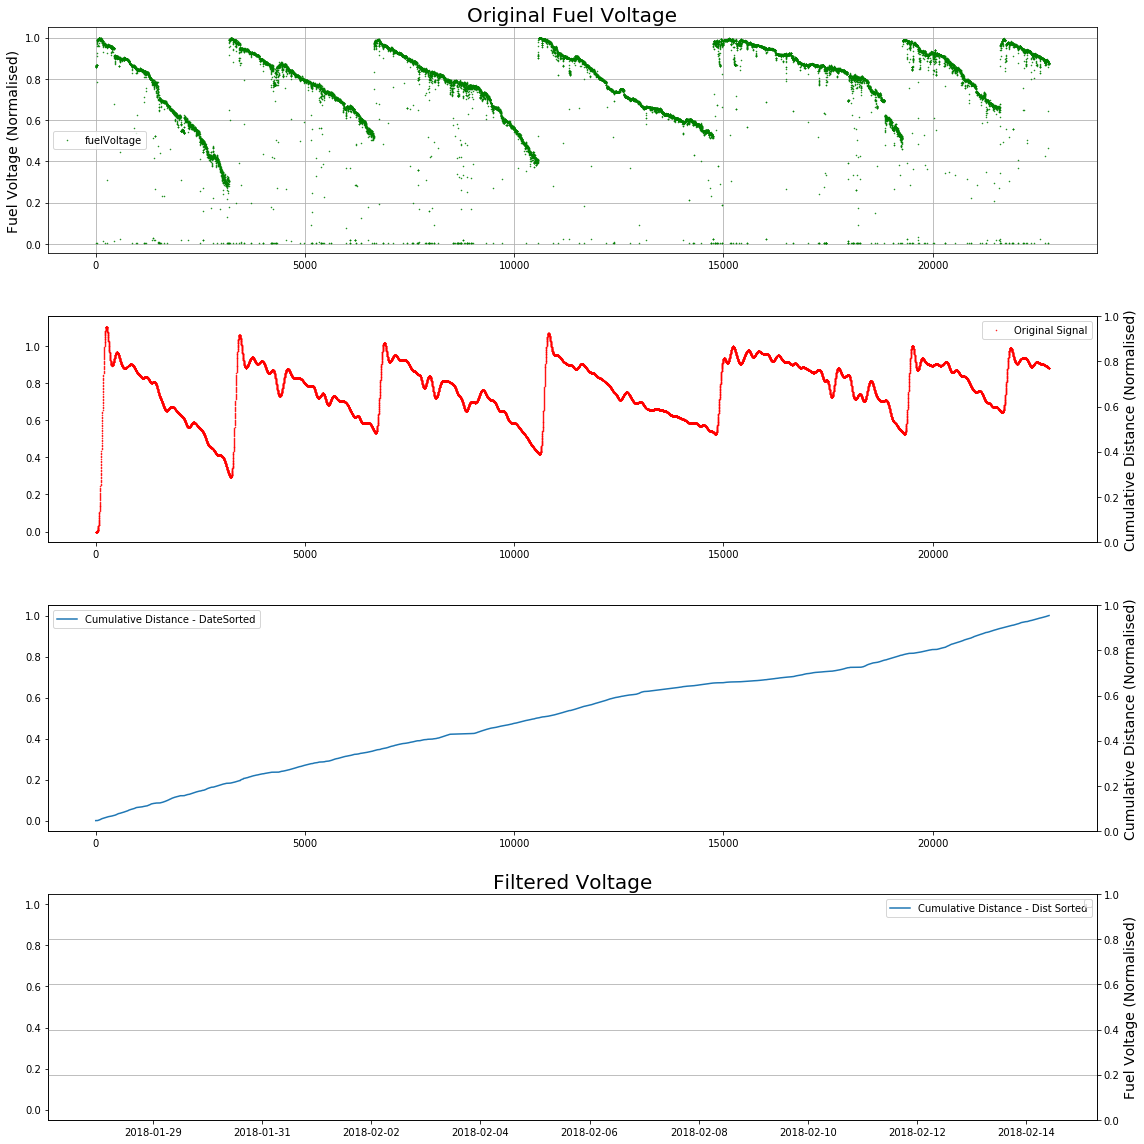

In [52]:
# Filter the data, and plot both the original and filtered signals.
fs = 500             # Sampling Frequency
order = 5             # Order of Filter
cutoff = 2          # Filter Cut-off Frequency

df = dff1.copy()
# Calling Butterworth filter
y = butter_lowpass_filter(norm_data, cutoff, fs, order, ftype= False)
y1 = butter_bandstop_filter(norm_data, 10,200,fs,order,False)
time = df.datetime

#Plotting Results
plt.rcParams['figure.figsize'] = [16,16]

plt.subplot(4, 1,1)
#plt.plot(time, norm_data, 'b-', linewidth=1, label='Original Signal')
plt.plot(df.index, df.fuelVoltage, 'g.', markersize = 1, linewidth = 1)
plt.legend()
plt.grid()
plt.ylabel('Fuel Voltage (Normalised)',  fontsize = 14)
plt.title('Original Fuel Voltage', fontsize = 20)
#plt.ylim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))
#plt.axvline(60000, color = 'black')

plt.subplot(4, 1,2)
plt.plot(df.index, y, 'r.', markersize=1, label='Original Signal')
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
#plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

plt.subplot(4, 1,3)
plt.plot(df.index, df['distance'], label='Cumulative Distance - DateSorted');
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
#plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

#df3 = df2.sort_values(by=['distance'], ascending=True);
plt.subplot(4, 1,4)
plt.plot(df.index, df['distance'], label='Cumulative Distance - Dist Sorted');
plt.legend()
plt.twinx()
plt.ylabel('Cumulative Distance (Normalised)',  fontsize = 14)
plt.xlim(datetime.datetime(2018,1,27,2,0), datetime.datetime(2018,2,15,6,55))

#plt.xlim(pd.)

# plt.subplot(4, 1,1)
# plt.plot(df.datetime, y1, 'r-', linewidth=3, label='Fuel Voltage, filtered')
# plt.ylim(0,1)
plt.grid()
plt.legend()
plt.ylabel('Fuel Voltage (Normalised)',  fontsize = 14)
plt.title('Filtered Voltage', fontsize = 20)
plt.xlabel('Time [sec]',  fontsize = 14)


plt.tight_layout()


#### **%%%%%%%%%%%%%%%***Relevant Portion Till Now**%%%%%%%%%%%%%**

### Cleaning Data 1

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.plot(df.datetime, df.distance, 'g-', markersize = 2, linewidth = 1);

In [ ]:
plt.plot(df.index[19700:19710], df.datetime[19700:19710], 'g-', linewidth = 1);

In [ ]:
df = df1.sort_values(['datetime'], ascending= True)

In [ ]:
df = df2.copy()
df.datetime = df.datetime.apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%d-%m %H:%M") )

In [ ]:
loadData()

In [ ]:
df1.datetime[29875:29884]

In [ ]:
df2.datetime[29875:29884]

In [ ]:
str(df3.datetime[29875:29884])

In [ ]:
plt.rcParams['figure.figsize'] = [8,4]
plt.plot(df1.index, df1.fuelVoltage, 'g-', markersize = 2, linewidth = 1);
plt.plot(df1.index, df1.distance, 'b-', markersize = 2, linewidth = 1);
#plt.xlim(datetime.datetime(2018,1,27), datetime.datetime(2018,2,3))
#plt.xlim(20000, 32000)


In [ ]:
dff = df1.copy()
dff = dff[dff.fuelVoltage >=0.05]
dff= dff.reset_index(drop=True)
plt.rcParams['figure.figsize'] = [8,4]
plt.plot(dff.index, dff.fuelVoltage, 'g.', markersize = 2, linewidth = 1);
plt.plot(dff.index, dff.distance, 'b-', markersize = 2, linewidth = 1);

In [ ]:
from scipy.signal import hilbert

fs = 4000
ass = hilbert(dff.fuelVoltage)
amplitude_envelope = np.abs(ass)
instantaneous_phase = np.unwrap(np.angle(ass))
instantaneous_frequency = (np.diff(instantaneous_phase)/(2.0*np.pi) * fs)

In [ ]:
plt.plot(dff.index, dff.fuelVoltage)
plt.plot(dff.index,amplitude_envelope)

In [ ]:
df.datetime[35404:35410]

In [ ]:
a = df2.datetime[35404]
datetime.datetime.strptime(str(a), "%Y-%m-%d %H:%M:%S").month

#### Replacing wrong data with corrected value
The equivalent predicted values generated out of the low pass filter, can be used to replace the erreneous/noisy data by the better approximate from the filter data.


In [ ]:
# Function to replace noise data using filtered approximate
df2 = df.copy()
def f(x):
    if x[4] > x[3] :
        return x[4]
    else:
        return x[3]

# Normalising fuel voltage data    
df2['Fuel Level (mV)'] = df2['Fuel Level (mV)']/df2['Fuel Level (mV)'].max()

df2['filter_dt'] = y1 
df2['correction'] = df2.apply(f, axis= 1)
df2.head()

In [ ]:
# Coverting timestamp to seconds, starting from time = 0
df2['time_in_sec'] = df2.Timestamp.apply(lambda x : (x - df.Timestamp[0]).total_seconds())
df2.head()

In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.ylim(0,1)

plt.subplot(1,1,1)
plt.scatter(df2.time_in_sec, df2['correction'])
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y1, 'red', linewidth = 2)
plt.title('Voltage Data minus Noise', fontsize = 20)


### 2nd level filtering
Still the data, donot looks better approximate. Hence, after replacing with the approximate data, the corrected data can be again passed through low pass filter to obtain better approximate of fuel voltage data

In [ ]:
y,y2 = butter_lowpass_filter(df2['correction'], cutoff, fs, order, ftype= False)

In [ ]:
plt.subplot(1,1,1)
plt.ylim(0,1)
plt.scatter(df2.time_in_sec, df2['correction'], s= 3)
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y1, 'red', linewidth = 2)
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, y2, 'black', linewidth = 2)
plt.title('Voltage Data minus Noise', fontsize = 20)

In [ ]:
plt.ylim(0,1)
plt.plot(df2.Timestamp, y2, 'black', linewidth = 2);
plt.title('Final Approximation after 2-Stage Filteration', fontsize = 20);

In [ ]:
#df2['filter_dt_L2'] = y2
dff.head()

### Method 2 : Regression
This is implemted, but dividing the data into small windows of a finite size = sz. And then passing the data of that window to function, he perform linear or 2nd order regression to give approximate curve.

In [ ]:
pd.set_option('display.width', 1000)

df = dfff1.copy()

#######################################
### Defining Regression Function
#####################################
df['timesec'] = df.datetime.apply(lambda x: (x - df.datetime[0]).total_seconds())

def regression_data(output_var , input_var):
    lm = sm.OLS(output_var, input_var)
    result = lm.fit()
    return result.params

# Linear Prediction
#########################
i = 0
sz =100   # Window Size
pred_dt = []
df['indexx'] = df.index
while (i<= len(df)):
    dft = df[i:i+sz].copy()
    dft['intercept'] = 1
    data = regression_data(dft.fuelVoltage, dft[['intercept','indexx']])
    prediction = dft['indexx']*data[1] + data[0]
    pred_dt.extend(prediction)
    i = i+sz
df['Regress_1st'] = pred_dt

In [ ]:
df.head()

In [ ]:
# 2nd order Prediction
################################
i = 0
#sz = 500  # Window Size
pred_dt = []
while (i<= len(df)):
    dft = df[i:i+sz].copy()
    dft['intercept'] = 1
    dft['index_sq'] = dft['indexx'].apply(lambda x: x*x)
    
    data = regression_data(dft.fuelVoltage, dft[['intercept','indexx','index_sq']])
    prediction = (dft['index_sq']*data[2] + dft['indexx']*data[1] + 1*data[0])
    pred_dt.extend(prediction)
    i = i+sz
    
df['Regress_2nd'] = pred_dt


In [ ]:
plt.rcParams['figure.figsize'] = [16,4]
plt.subplot(1,1,1)
plt.plot(df.index, df.Regress_1st, 'y.', markersize = 2, linewidth = 1)
plt.legend()

plt.subplot(1,1,1)
#plt.plot(df.timesec, df.Regress_2nd, '-r', label = 'Regression 2nd Order')
plt.legend()

plt.subplot(1,1,1)
#plt.plot(df.index, df.fuelVoltage, 'g.',markersize = 2, linewidth = 1)
plt.legend()

plt.ylabel('Normalised Voltage', fontsize = 14)
plt.xlabel('Time (in sec)', fontsize = 14)
plt.title('Regression 1st order VS 2nd Order', fontsize = 20);


In [ ]:
df2.head()

### Final Conclusion
Finally we can compare the approximare curve obtained from both the methods

In [ ]:
plt.rcParams['figure.figsize'] = [16,6]
plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.predict_2nd, '-r', label = 'Regression Data')
plt.legend()

plt.subplot(1,1,1)
plt.scatter(df2.time_in_sec, df2['correction'], s = 5, label = 'Original Voltage minus Noise')
plt.legend()

plt.subplot(1,1,1)
plt.plot(df2.time_in_sec, df2.filter_dt_L2, 'black', linewidth = 2, label = 'Filtered Voltage Data')
plt.legend()

plt.ylim(0,1)
plt.ylabel('Normalised Voltage', fontsize = 14)
plt.xlabel('Time (in sec)', fontsize = 14)
plt.title('Filter Data VS Regression Data', fontsize = 20);


##### Hence the filtered Data give the better representation of Fuel Voltage Data.

In [ ]:
plt.ylim(0,1)
plt.rcParams['figure.figsize'] = [16,6]
plt.ylabel('Normalised Fuel Voltage (mV)', fontsize = 14)
plt.xlabel('Time', fontsize = 14)
plt.plot(df2.Timestamp, y2, 'black', linewidth = 2);
plt.title('Final Approximation', fontsize = 20);

In [ ]:
plt.plot(dff1.distance, dff1.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

In [ ]:
plt.plot(dff3.distance, dff3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

In [ ]:
plt.plot(dff3.index, dff3.fuelVoltage, 'g.', markersize = 2, linewidth = 1);

In [ ]:
dff3.datetime[9600:9700]